**recommender**

In [2]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import numpy as np
from numpy.linalg import norm
import os
import pickle
from sklearn.neighbors import NearestNeighbors
import cv2
# from IPython.display import Image
from matplotlib import pyplot as plt

**product image**

In [63]:
img_path = 'sample/shoes2.jpg'

([], [])

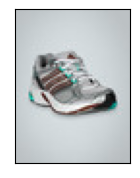

In [64]:
img = cv2.imread(img_path)
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.xticks([])
plt.yticks([])

**create ResNet50 CNN model**

In [65]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

In [66]:
model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

**extract features**

In [67]:
def extract_features(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

In [68]:
normalized_result = extract_features(img_path,model)

1/1 [==============================] - 1s 1s/step


**dataset embeddings**

In [69]:
feature_list = np.array(pickle.load(open('embeddings.pkl','rb')))
filenames = pickle.load(open('filenames.pkl','rb'))

**k-nearest neighbor algorithm**

In [70]:
neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [71]:
distances,indices = neighbors.kneighbors([normalized_result])

**recommended products**

In [72]:
indices

array([[20773, 35405, 18630, 18633, 29728,  3100]], dtype=int64)

In [73]:
output=[]
for file in indices[0][0:6]:
    temp_img = cv2.imread(filenames[file])
    output.append(temp_img)

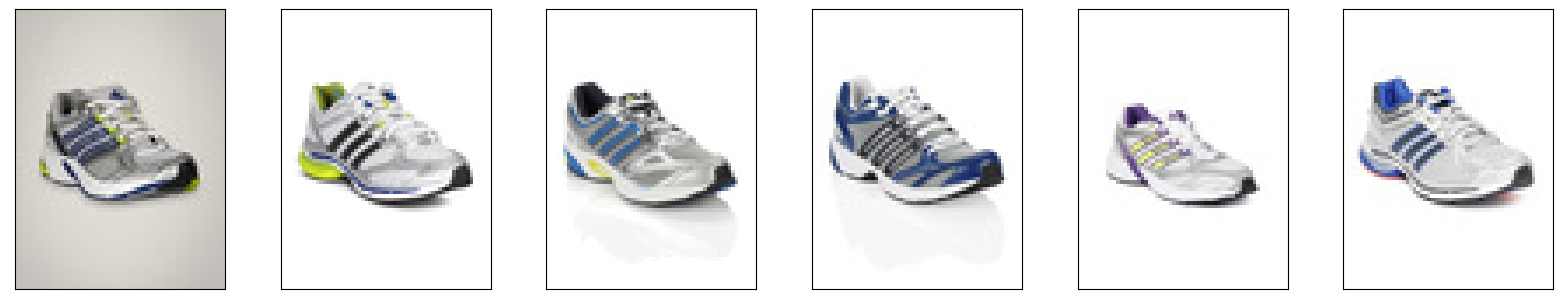

In [74]:
plt.figure(figsize=(20, 8))
n=6
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    # plt.imshow(output[i])
    plt.imshow(cv2.cvtColor(output[i], cv2.COLOR_BGR2RGB))

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)